In [1]:
import numpy as np
import pandas as pd
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris

iris = load_iris()

In [5]:
list (iris.target_names)

['setosa', 'versicolor', 'virginica']

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data
Y = iris.target

In [24]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(report)


Accuracy: 86.67%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



In [ ]:
### Вместо XGB повторить с  LightGBM https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
### Построить гистограммы на matplotlib всех 4х параметров

In [2]:
import lightgbm as lgb

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=6)

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(report)

Accuracy: 96.67%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [11]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

Text(0.5, 1.0, 'petal width')

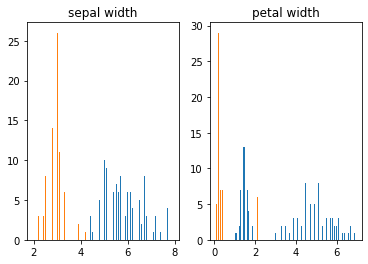

In [20]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
n_bins = len(data)
axs[0].hist(data['sepal length (cm)'], bins=n_bins)
axs[0].set_title('sepal length')
axs[0].hist(data['sepal width (cm)'], bins=n_bins)
axs[0].set_title('sepal width')
axs[1].hist(data['petal length (cm)'], bins=n_bins)
axs[1].set_title('petal length')
axs[1].hist(data['petal width (cm)'], bins=n_bins)
axs[1].set_title('petal width')